# Artificial Neural Networks

## Perceptron


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([0])

## Building an Image Classifier using the sequential api



In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [7]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [8]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.7011 - accuracy: 0.7710 - val_loss: 0.5119 - val_accuracy: 0.8250
Epoch 2/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4784 - accuracy: 0.8335 - val_loss: 0.4546 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4347 - accuracy: 0.8481 - val_loss: 0.4103 - val_accuracy: 0.85940.4357 - accu
Epoch 4/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4090 - accuracy: 0.8568 - val_loss: 0.4230 - val_accuracy: 0.8484loss: 0.4141 - accuracy:  - ETA: 2s - ETA: 1s - loss: 0.4135 - accuracy: 0.85 - ETA: 1s - ETA: 0s - loss:
Epoch 5/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3890 - accuracy: 0.8630 - val_loss: 0.3860 - val_accuracy: 0.8704
Epoch 6/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3742

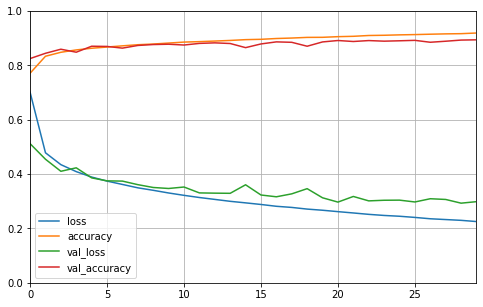

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
